In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv("clean_dataset.csv")

In [3]:
df.head(3)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.00,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.46,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.50,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1


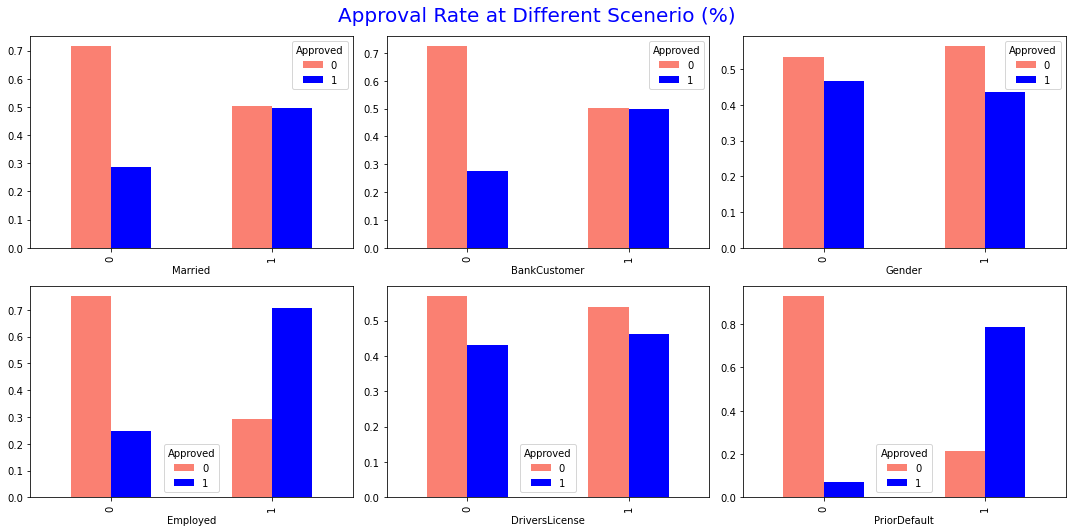

In [4]:
col=['Married','BankCustomer','Gender','Employed', 'DriversLicense', 'PriorDefault']
n_rows=2
n_cols=3
fig, ax=plt.subplots(n_rows,n_cols,figsize=(15,7.5))
for r in range(0,n_rows):
    for c in range(0,n_cols):
        i=r*n_cols+c
        if i<len(col):
            ax_i=ax[r,c]
            fig.suptitle('Approval Rate at Different Scenerio (%)',color='Blue',fontsize=20)
            pd.crosstab(df[col[i]],df.Approved,normalize='index').plot(kind='bar',color=["Salmon","Blue"],ax=ax_i);
            plt.xticks(rotation=0);
            ax_i.set_xticklabels(ax_i.get_xticklabels(),rotation=90);      
plt.tight_layout()

1. Unmarried people has more chance of Approval
2. People who are not bank customer las less chance of Approval
3. Employed has high chance for approval and enemployed has less chance for approval
3. Customer wihout prior default has less chance of approval and people with prior default has high chance of approval

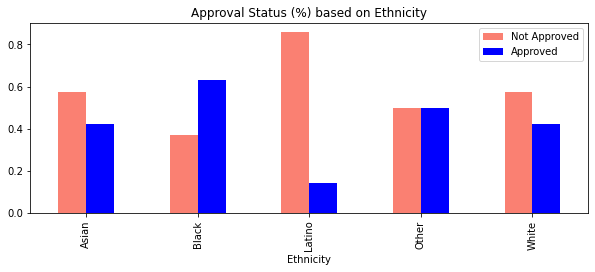

In [10]:
pd.crosstab(df.Ethnicity,df.Approved,normalize='index').plot(kind='bar',figsize=(10,3.5),color=["Salmon","Blue"]);
plt.title("Approval Status (%) based on Ethnicity")
plt.legend(["Not Approved", "Approved"]);
plt.xticks(rotation=90);

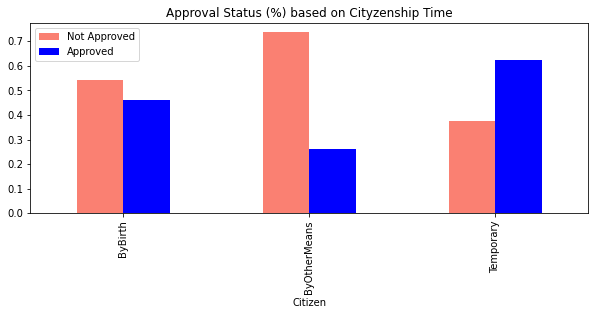

In [11]:
pd.crosstab(df.Citizen,df.Approved,normalize='index').plot(kind='bar',figsize=(10,3.5),color=["Salmon","Blue"]);
plt.title("Approval Status (%) based on Cityzenship Time")
plt.legend(["Not Approved", "Approved"]);
plt.xticks(rotation=90);

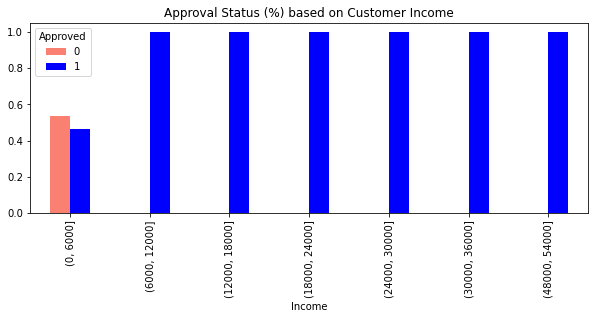

In [12]:
bins=range(min(df.Income),max(df.Income),6000)
df['IncomeB']=pd.cut(df['Income'],bins=bins)    
pd.crosstab(df.IncomeB, df.Approved,normalize='index').plot(kind='bar',figsize=(10,3.5),color=["Salmon","Blue"]);
plt.title("Approval Status (%) based on Customer Income")
plt.xlabel("Income");

People with Income less then 6000 has less chance for approval and for customer over 6000 has a 100% record of approval

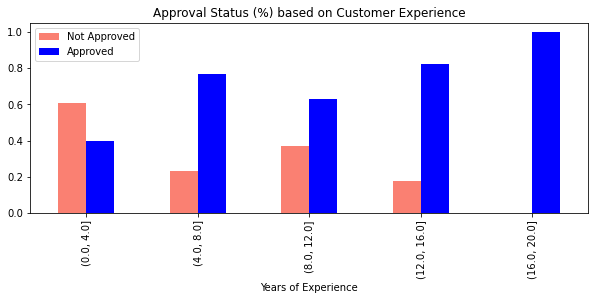

In [13]:
bins=np.arange(min(df.YearsEmployed),max(df.YearsEmployed),4)
df['YearsEmployedB']=pd.cut(df['YearsEmployed'],bins=bins)    
pd.crosstab(df.YearsEmployedB, df.Approved,normalize='index').plot(kind='bar',figsize=(10,3.5),color=["Salmon","Blue"]);
plt.legend(["Not Approved", "Approved"]);
plt.title("Approval Status (%) based on Customer Experience")
plt.xlabel("Years of Experience");

As the experience increases customer has higer chance of approval. 
And there is no record of rejection with 16+ years of experience

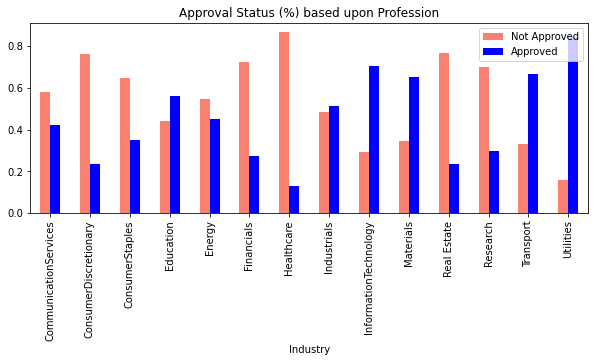

In [15]:
pd.crosstab(df.Industry,df.Approved,normalize='index').plot(kind='bar',figsize=(10,3.5),color=["Salmon","Blue"]);
plt.title("Approval Status (%) based upon Profession")
plt.legend(["Not Approved", "Approved"]);
plt.xticks(rotation=90);

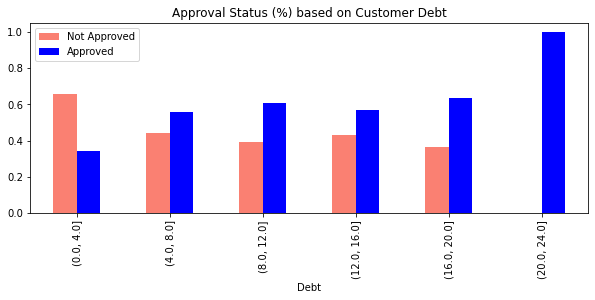

In [17]:
bins=np.arange(min(df.Debt),max(df.Debt),4)
df['DebtB']=pd.cut(df['Debt'],bins=bins)    
pd.crosstab(df.DebtB, df.Approved,normalize='index').plot(kind='bar',figsize=(10,3.5),color=["Salmon","Blue"]);
plt.legend(["Not Approved", "Approved"]);
plt.xlabel("Debt");
plt.title("Approval Status (%) based on Customer Debt");

Text(0.5, 1.0, 'Approval Status (%) based on Customer Age')

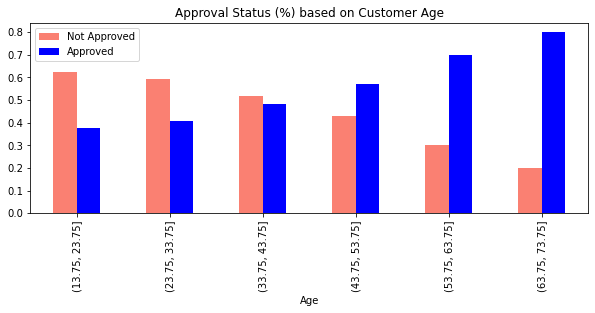

In [18]:
bins=np.arange(min(df.Age),max(df.Age),10)
df['AgeB']=pd.cut(df['Age'],bins=bins)    
pd.crosstab(df.AgeB, df.Approved,normalize='index').plot(kind='bar',figsize=(10,3.5),color=["Salmon","Blue"]);
plt.legend(["Not Approved", "Approved"]);
plt.xlabel("Age");
plt.title("Approval Status (%) based on Customer Age")

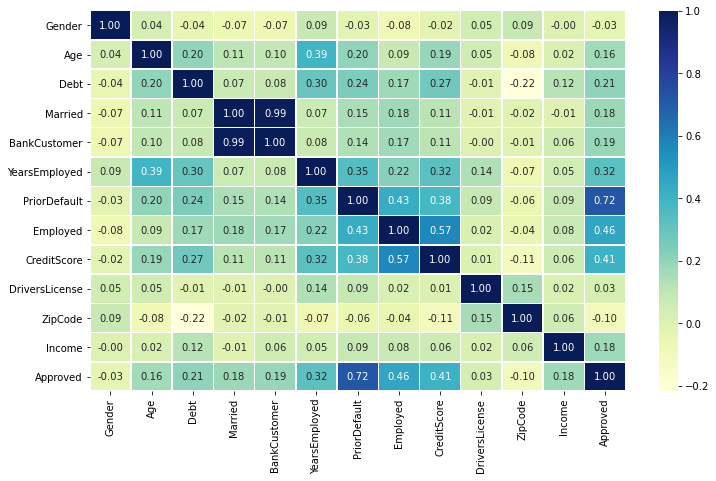

In [19]:
fig, ax=plt.subplots(figsize=(12,7))
ax=sns.heatmap(df.corr(),
            annot=True,
              linewidth=0.5,
              fmt=".2f",
              cmap="YlGnBu")